### Scikit-Learn Basics with Wine Dataset

1. **Load Data**

In [2]:
from sklearn.datasets import load_wine
data = load_wine()


In [16]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


- we’ve got wine data with features like acidity, alcohol content, etc., ready to classify wine types.

2. **Preprocess the Data**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

# Scale data for consistency
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


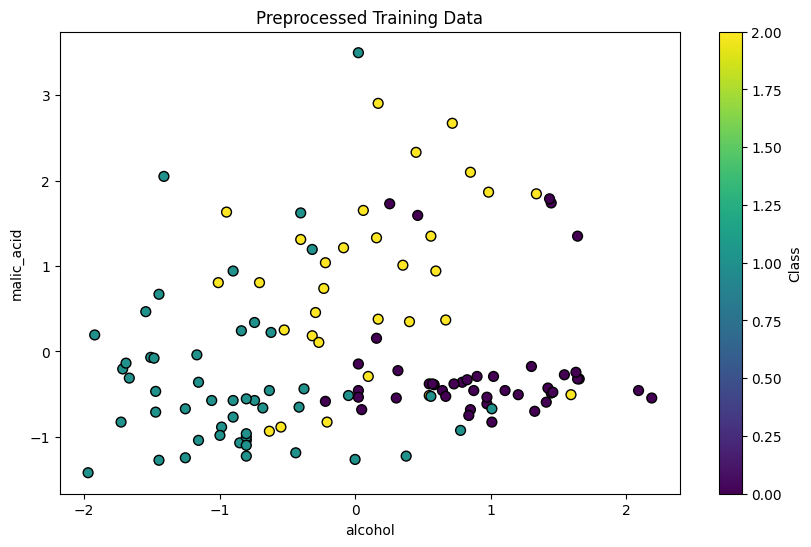

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Preprocessed Training Data')
plt.colorbar(label='Class')
plt.show()

 - **Scaling** (using `StandardScaler`) standardizes features, so they all contribute equally—essential when features have different ranges.

- **Train-Test Split** ✅
-  **Feature Scaling** (StandardScaler) ✅
- Handling Missing Values
- Encoding Categorical Variables (OneHotEncoder, LabelEncoder)

3. **Train a Model**

In [5]:
from sklearn.ensemble import RandomForestClassifier
    
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

 - **Random Forest**: A versatile, solid model. Model learns wine classifications from training data.

- **Choosing and Training a Model** (Logistic Regression, Random Forest) ✅
- More Algorithms (SVM, KNN, Decision Trees)

4. **Evaluate Model**

In [6]:
from sklearn.metrics import accuracy_score
    
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9629629629629629


 - **Accuracy Score**: Checks how many predictions are correct. Higher accuracy = better!


- **Accuracy Score** ✅
-   Precision, Recall, F1-Score
-  Confusion Matrix, ROC Curve, AUC Score

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



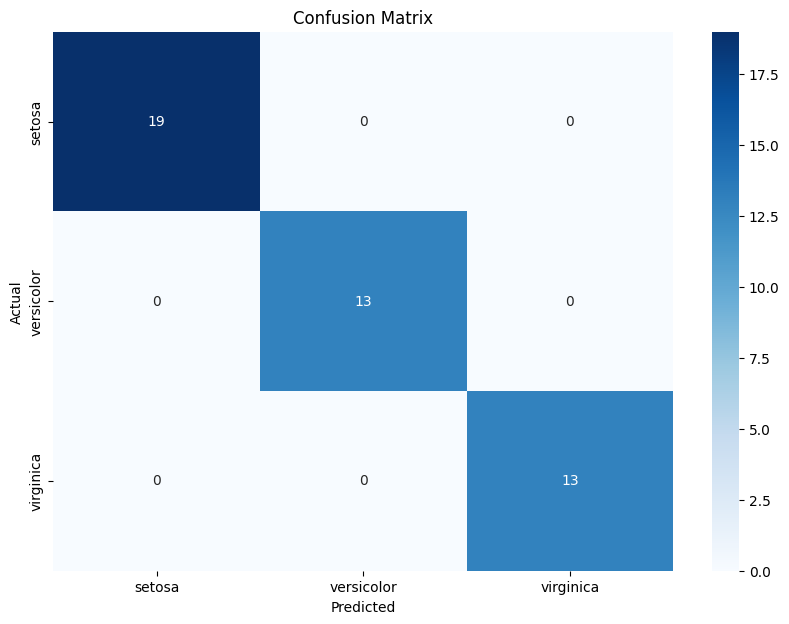

In [20]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5. **Tune Hyperparameters (Fine-tune the Model)**

In [7]:
from sklearn.model_selection import GridSearchCV
    
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': 5, 'n_estimators': 100}


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


- **GridSearchCV**: Tests different model settings to find the best combo. Boosts model performance!

-  **GridSearchCV** ✅
-   RandomizedSearchCV